In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


import random
random.seed(10)

In [21]:
digit = pd.read_csv('digit_recognizer_train.csv')
display(digit.shape)
display(digit.head())

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = digit.drop(['label'],axis = 1)
y = digit['label']
X.shape

(42000, 784)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [24]:
X_train.shape

(33600, 784)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit_transform(X_train)

array([[ 1.75750823e+02,  2.03867531e+02, -4.37023199e+02, ...,
        -3.79986319e+01,  6.28669147e+00,  2.32272268e+01],
       [ 1.67427444e+02,  9.29001206e+02, -8.43154783e+02, ...,
         3.34070732e+01,  6.70235779e+00, -2.62925538e+01],
       [-3.56562599e+02, -9.80395145e+02, -1.17756921e+02, ...,
        -1.92763079e-01,  1.83859967e+01, -1.51676558e+01],
       ...,
       [-3.99826722e+02,  8.08869105e+02,  6.11087422e+02, ...,
         5.64089017e+00, -1.32483367e+01, -1.27674943e+00],
       [-1.50173726e+02, -4.78427053e+02,  4.29689663e+02, ...,
         1.64608170e+01, -3.08919954e+00, -1.34048048e+01],
       [-8.95625247e+02,  4.85896653e+02,  1.04998059e+02, ...,
         9.05654941e+00,  7.11627905e-01, -6.65348449e+00]])

In [26]:
pca.components_[:,:].T.shape

(784, 330)

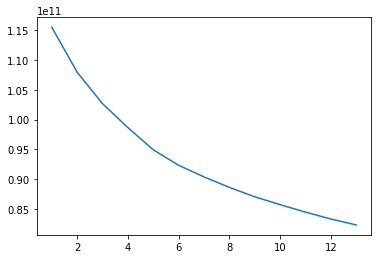

In [27]:
from sklearn.cluster import KMeans
optim = []
for k in range(1,14):
    kmeans = KMeans(n_clusters = k,random_state =14)
    kmeans.fit(X_train)
    optim.append(kmeans.inertia_)
plt.plot(range(1,14),optim)
plt.show()

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge',random_state= 14)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=14, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv = 3)

In [13]:
from sklearn.metrics import f1_score
f1_score(y_train_pred,y_train,average = 'weighted')

0.8771029538721302

In [14]:
pca.transform(X_test)

array([[ 6.51930520e+02, -4.61609297e+02, -6.69175369e+02, ...,
         9.78730443e-01, -4.31799029e+00, -1.00000084e+01],
       [-4.42578722e+02,  4.37729740e+02, -2.49608827e+02, ...,
        -4.50699199e+00, -5.00788452e+00, -8.93253978e+00],
       [ 2.15308444e+02, -3.75153804e+02,  4.71075684e+02, ...,
        -3.87808775e+01, -1.09748981e+01,  3.83050962e+01],
       ...,
       [ 1.74983248e+02,  1.02871838e+02,  4.89318777e+02, ...,
        -1.93997815e+01,  1.68285159e-01, -1.70771503e+01],
       [-1.17187011e+02,  4.59296233e+02, -5.08449875e+01, ...,
        -7.97270624e+00,  1.57684809e+01, -4.02046052e+00],
       [ 1.57078765e+03, -2.92486610e+02,  1.34720339e+02, ...,
        -4.47612889e+00, -5.31472705e+01, -2.13895091e+01]])

In [15]:
y_test_pred = cross_val_predict(sgd_clf,X_test,y_test,cv = 3)

In [16]:
f1_score(y_test_pred,y_test,average = 'weighted')

0.8349930502456218

In [18]:
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs',C=9)
softmax.fit(X_train,y_train)
y_train_pred_sm = cross_val_predict(softmax,X_train,y_train,cv=3)

In [19]:
f1_score(y_train_pred_sm,y_train,average = 'weighted')

0.9083086733413683